In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
esencial = pd.read_csv('gastos esenciales.csv')
grupos_sanos = esencial.groupby('Mes')
noviembre_sano = grupos_sanos.get_group(11)
diciembre_sano = grupos_sanos.get_group(12)
enero_sano = grupos_sanos.get_group(1)
febrero_sano = grupos_sanos.get_group(2)
marzo_sano = grupos_sanos.get_group(3)

In [15]:
no_esencial = pd.read_csv('gastos no esenciales.csv')
grupos_insanos = no_esencial.groupby('Mes')
noviembre_insano = grupos_insanos.get_group(11)
diciembre_insano = grupos_insanos.get_group(12)
enero_insano = grupos_insanos.get_group(1)
febrero_insano = grupos_insanos.get_group(2)
marzo_insano = grupos_insanos.get_group(3)

In [16]:
def categoria_cliente(mes_sano, mes_insano):
  mes_sano = mes_sano[['id_cliente', 'monto_transaccion']]
  mes_sano1 = mes_sano.groupby('id_cliente').sum().reset_index()

  mes_insano = mes_insano[['id_cliente', 'monto_transaccion']]
  mes_insano1 = mes_insano.groupby('id_cliente').sum().reset_index()

  clientes = []
  ambas = []
  for i in range(1,10001):
    if (i not in list(mes_insano1['id_cliente'])) and (i not in list(mes_sano1['id_cliente'])):
      clientes += [[i,'NG']]
      continue
    
    if i not in list(mes_insano1['id_cliente']):
      clientes += [[i,'S']]
    
    if i not in list(mes_sano1['id_cliente']):
      clientes += [[i,'N']]
    
    if (i in list(mes_insano1['id_cliente'])) and (i in list(mes_sano1['id_cliente'])):
      ambas += [i]
  
  sano = []
  for i in range(len(mes_sano1['id_cliente'])):
    if mes_sano1['id_cliente'][i] in ambas:
      sano +=[round(mes_sano1['monto_transaccion'][i],2)]
  
  insano = []
  for i in range(len(mes_insano1['id_cliente'])):
    if mes_insano1['id_cliente'][i] in ambas:
      insano +=[round(mes_insano1['monto_transaccion'][i],2)]
  
  for i in range(len(ambas)):
    if sano[i]/insano[i] >= 5/3:
      clientes += [[ambas[i],'S']]
    
    if sano[i]/insano[i] < 5/3:
      clientes += [[ambas[i],'N']]
  
  df = pd.DataFrame(clientes, columns = ['id','tipo'])

  df_ordenado = df.sort_values("id", ascending=True)

  df = df_ordenado['tipo']
  
  return list(df)

In [17]:
noviembre = categoria_cliente(noviembre_sano, noviembre_insano)
diciembre = categoria_cliente(diciembre_sano, diciembre_insano)
enero = categoria_cliente(enero_sano, enero_insano)
febrero = categoria_cliente(febrero_sano, febrero_insano)
marzo = categoria_cliente(marzo_sano, marzo_insano)

In [18]:
id = []
for i in range(1,10001):
  id += [i]

In [21]:
clientes = {'id_cliente': id, 
            'noviembre': noviembre, 
            'diciembre': diciembre,
            'enero':enero,
            'febrero': febrero,
            'marzo':marzo
            }
clientes_categorizados = pd.DataFrame(clientes)

In [25]:
#clientes_categorizados.to_csv('Clientes categorizados.csv')

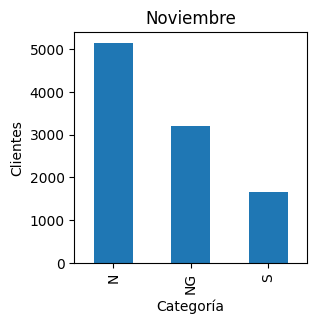

In [34]:
plt.figure(figsize=(3,3))
clientes_categorizados['noviembre'].value_counts().plot(kind='bar')
plt.title('Noviembre')
plt.xlabel('Categoría')
plt.ylabel('Clientes')
plt.show()

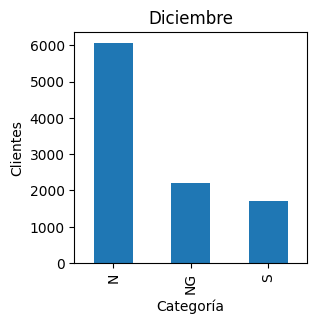

In [35]:
plt.figure(figsize=(3,3))
clientes_categorizados['diciembre'].value_counts().plot(kind='bar')
plt.title('Diciembre')
plt.xlabel('Categoría')
plt.ylabel('Clientes')
plt.show()

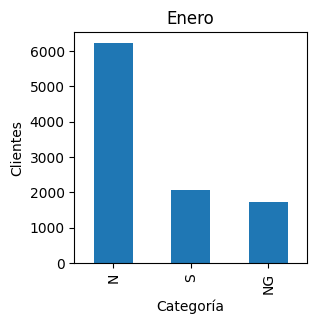

In [36]:
plt.figure(figsize=(3,3))
clientes_categorizados['enero'].value_counts().plot(kind='bar')
plt.title('Enero')
plt.xlabel('Categoría')
plt.ylabel('Clientes')
plt.show()

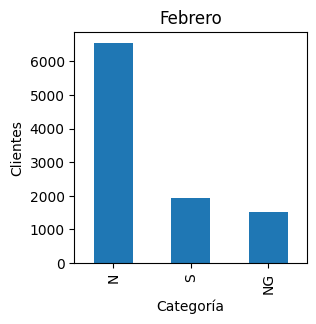

In [37]:
plt.figure(figsize=(3,3))
clientes_categorizados['febrero'].value_counts().plot(kind='bar')
plt.title('Febrero')
plt.xlabel('Categoría')
plt.ylabel('Clientes')
plt.show()

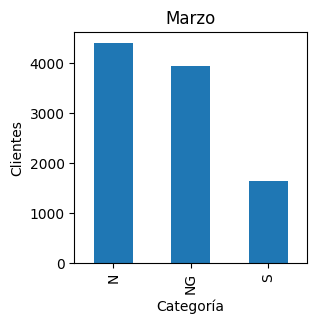

In [38]:
plt.figure(figsize=(3,3))
clientes_categorizados['marzo'].value_counts().plot(kind='bar')
plt.title('Marzo')
plt.xlabel('Categoría')
plt.ylabel('Clientes')
plt.show()